# Training Models

## Loading in the data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# load in all of the data
sodankyla = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/sodankyla_fpi/sodankyla_red_merged(30_seconds_diff).csv")
kiruna = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/kiruna_fpi/kiruna_red_merged(30_seconds_diff).csv")

# all datetime columns need to be converted back to datetime from string as pandas cant save them in this format
sodankyla.datetime = pd.to_datetime(sodankyla.datetime)
kiruna.datetime = pd.to_datetime(kiruna.datetime)

In [3]:
sodankyla.head(5)

,mirror,intensity,intensityError,windSpeed,windSpeedError,temp,tempError,chiSquared,sigToNoiseRatio,datetime,sensorTemp,skyTemp,clarity,light,rain
0,15,19445.41,105.44,-21.77,3.26,409.98,6.53,0.12,24868.0,2019-02-01 15:16:03,2.3,-40.6,42.8,0.0,0.0
1,4,25100.11,79.40,-27.46,2.57,1567.10,14.51,0.37,71291.0,2019-02-01 15:19:09,2.3,-40.8,43.0,0.0,-0.2
2,14,31737.28,106.74,-7.93,2.73,1540.68,15.14,0.38,62523.0,2019-02-01 15:19:46,2.3,-41.7,44.0,0.0,-0.2
3,1,29767.50,98.48,-19.43,2.69,1547.51,14.96,0.37,64765.0,2019-02-01 15:22:52,2.2,-40.4,42.6,0.0,-0.1
4,8,19014.86,69.20,-53.74,2.95,1611.52,17.21,0.59,54783.0,2019-02-01 15:23:21,2.2,-40.4,42.6,0.0,-0.1


In [4]:
kiruna.head(5)

,mirror,intensity,intensityError,windSpeed,windSpeedError,temp,tempError,chiSquared,sigToNoiseRatio,datetime,sensorTemp,skyTemp,clarity,light,rain
0,8,1036.74,2.41,14.41,1.09,215.49,1.27,2.36,111212.0,2019-02-01 15:04:37,-2.5,-8.3,5.8,0.0,0.6
1,8,3315.85,4.06,1901.73,0.49,242.92,0.71,8.44,275712.0,2019-02-01 15:04:46,-2.5,-8.3,5.8,0.0,0.6
2,8,1668.01,2.95,2.65,1.31,882.96,3.96,2.57,190631.0,2019-02-01 15:10:17,-2.6,-8.4,5.9,0.0,0.7
3,8,3305.77,3.49,1905.15,0.43,244.44,0.62,11.96,372759.0,2019-02-01 15:10:28,-2.6,-8.4,5.9,0.0,0.7
4,8,1674.81,3.05,12.87,1.35,886.85,4.10,2.25,179485.0,2019-02-01 15:16:08,-2.5,-8.2,5.7,0.0,0.7


We're going to need ome type of regression algorithm to model relationships between the data

## Regression

Set parameters

In [5]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from tensorflow import keras

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [8]:
#list of weight initialisers we can use
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [9]:
#list of activation functions we can use
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
#list of optimizers we can use
[m for m in dir(keras.optimizers) if not m.startswith("_")]

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [11]:
#reminder of the keys we can use in our dataframe 
sodankyla.keys()

Index(['mirror', 'intensity', 'intensityError', 'windSpeed', 'windSpeedError',
       'temp', 'tempError', 'chiSquared', 'sigToNoiseRatio', 'datetime',
       'sensorTemp', 'skyTemp', 'clarity', 'light', 'rain'],
      dtype='object')

In [12]:
#selecting the keys we want to train the model with
X_df = sodankyla[['intensity', 'intensityError', 'windSpeed', 'windSpeedError', 'chiSquared', 'sigToNoiseRatio',
       'sensorTemp', 'skyTemp', 'clarity', 'light', 'rain']]

#convert the df to numpy array as this is what tf wants
X = X_df.to_numpy()

#sleetc and convert the target to numpy array as this is what tf wants
y = sodankyla['temp'].to_numpy()

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [14]:
X_test_scaled.shape

(12366, 11)

In [26]:
# Initialize the neural network model
reset_state()
model = Sequential()

# set a bacth size for training
batch_size = 10

# Add layers with He initializat(ion
model.add(Dense(64, input_dim=len(X_df.keys()), activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(16, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='relu', kernel_initializer='he_normal'))  # Output layer for regression

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=["mean_absolute_percentage_error"])

In [28]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 2s 301us/step - loss: 781847.8125 - mean_absolute_percentage_error: 42.5764 - val_loss: 177348.4219 - val_mean_absolute_percentage_error: 25.0553
Epoch 2/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - loss: 172407.1562 - mean_absolute_percentage_error: 23.8303 - val_loss: 163118.0469 - val_mean_absolute_percentage_error: 24.1876
Epoch 3/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - loss: 162322.3438 - mean_absolute_percentage_error: 23.1139 - val_loss: 158039.2188 - val_mean_absolute_percentage_error: 23.8680
Epoch 4/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - loss: 158089.4844 - mean_absolute_percentage_error: 22.8421 - val_loss: 155403.0625 - val_mean_absolute_percentage_error: 23.7256
Epoch 5/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - loss: 155782.0312 - mean_absolute_percentage_error: 22.7085 - val_loss: 153765.4844 - val_mean_absolute_percentage_error: 23.6786
Epoch 6/250
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/ste

In [18]:
#model.save()

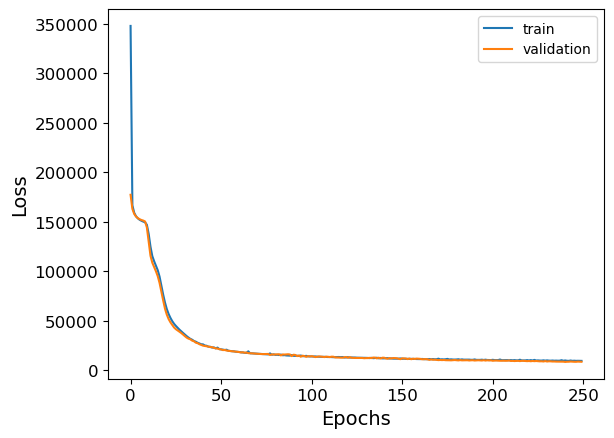

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 8834.5684 - mean_absolute_percentage_error: 3.6661
Test Loss: [8735.1875, 3.779841661453247]
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


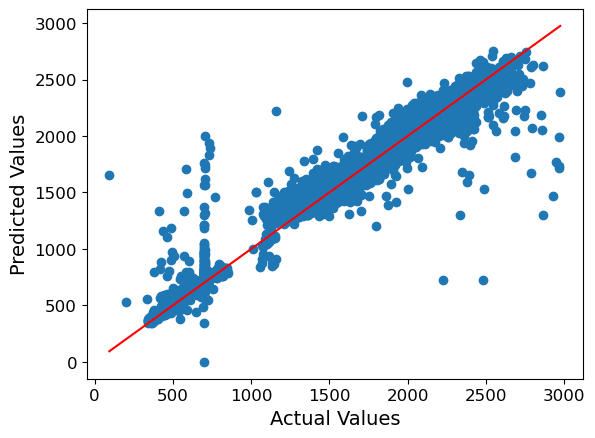

In [29]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()